## 광고 제거

### 크롤링 파일 로드

In [1]:
import pandas as pd
import numpy as np

# 크롤링 데이터 가져오기
data = pd.read_pickle('seoul_oneroom_renew.pkl') # 본인이 크롤링한 파일 입력
data

,id,lat,lng,info,url,address,detail,picture,type,deposit,rental_fee,maintenance_fee
144,34402581,37.446504,127.057650,{'url': 'https://www.zigbang.com/home/oneroom/...,https://www.zigbang.com/home/oneroom/items/344...,서울시 서초구 신원동,"◆◆전입가,무융자,전세대출가,지하철역3분◆이중창,주차가능 ◆◆전입가,무융자,전세대출...",https://ic.zigbang.com/ic/items/34402581/1.jpg,전세,17500,NaN,8.0
145,34448303,37.446532,127.057644,{'url': 'https://www.zigbang.com/home/oneroom/...,https://www.zigbang.com/home/oneroom/items/344...,서울시 서초구 신원동,청계산입구 초 역세권 오피스텔 *청계산입구 초 역세권 신축 오피스텔\r\n*강남역3...,https://ic.zigbang.com/ic/items/34448303/1.jpg,월세,1000,65.0,10.0
159,34521223,37.447032,127.056570,{'url': 'https://www.zigbang.com/home/oneroom/...,https://www.zigbang.com/home/oneroom/items/345...,서울시 서초구 신원동,★신축급 풀옵션 투룸 오피스텔 전세 매물★ # 12월8일 이후부터 투어 가능\r\...,https://ic.zigbang.com/ic/items/34521223/1.jpg,전세,37500,NaN,20.0
165,34493219,37.446730,127.056288,{'url': 'https://www.zigbang.com/home/oneroom/...,https://www.zigbang.com/home/oneroom/items/344...,서울시 서초구 신원동,청계산입구 초 역세권 오피스텔 *청계산입구 초 역세권 신축 오피스텔\r\n*강남역3...,https://ic.zigbang.com/ic/items/34493219/1.jpg,전세,17000,NaN,8.0
188,34498546,37.447738,127.056370,{'url': 'https://www.zigbang.com/home/oneroom/...,https://www.zigbang.com/home/oneroom/items/344...,서울시 서초구 신원동,청계산입구 초 역세권 오피스텔 사업자용 *청계산입구 초 역세권 신축 오피스텔\r\n...,https://ic.zigbang.com/ic/items/34498546/1.jpg,월세,1000,88.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
39941,34512135,37.680000,127.042272,{'url': 'https://www.zigbang.com/home/oneroom/...,https://www.zigbang.com/home/oneroom/items/345...,서울시 도봉구 도봉동,✔신축급풀옵션_방큰원룸✔역세권_도봉역 4분✔즉시입주 1. 오픈형원룸/수려한 도봉산경...,https://ic.zigbang.com/ic/items/34512135/1.jpg,월세,500,37.0,3.0
39942,34522766,37.680244,127.044085,{'url': 'https://www.zigbang.com/home/oneroom/...,https://www.zigbang.com/home/oneroom/items/345...,서울시 도봉구 도봉동,✔풀옵션_깨끗✔역세권_1호선도봉역 4분✔버스전용 20개노선 1. 교통편리 : 역세권...,https://ic.zigbang.com/ic/items/34522766/1.jpg,월세,300,30.0,3.0
39943,34411514,37.680953,127.043451,{'url': 'https://www.zigbang.com/home/oneroom/...,https://www.zigbang.com/home/oneroom/items/344...,서울시 도봉구 도봉동,🌈도봉역 2019년식 투룸 안심대출가능 주차가능🌈 📌매물정보\r\n 도봉역5...,https://ic.zigbang.com/ic/items/34411514/1.jpg,전세,20400,NaN,4.0
39944,34575820,37.680461,127.043434,{'url': 'https://www.zigbang.com/home/oneroom/...,https://www.zigbang.com/home/oneroom/items/345...,서울시 도봉구 도봉동,💰HUG 안심전세💰초역세권💰깔끔한 투룸 전세💰 🌈 매물 소개 🌈\r\n\r\n1️⃣...,https://ic.zigbang.com/ic/items/34575820/1.jpg,전세,20000,NaN,4.0


In [14]:
data = data[['id', 'address', 'detail']]

In [15]:
data = data[data['detail'].notna()]

In [16]:
data[data.detail.isnull()]

,id,address,detail


In [2]:
# 블로그 본문, 댓글 합쳐 하나의 document로 만들기

data['doc'] = data['address']+' '+data['detail']
data.head()

,id,lat,lng,info,url,address,detail,picture,type,deposit,rental_fee,maintenance_fee,doc
144,34402581,37.446504,127.057650,{'url': 'https://www.zigbang.com/home/oneroom/...,https://www.zigbang.com/home/oneroom/items/344...,서울시 서초구 신원동,"◆◆전입가,무융자,전세대출가,지하철역3분◆이중창,주차가능 ◆◆전입가,무융자,전세대출...",https://ic.zigbang.com/ic/items/34402581/1.jpg,전세,17500,NaN,8.0,"서울시 서초구 신원동 ◆◆전입가,무융자,전세대출가,지하철역3분◆이중창,주차가능 ◆◆..."
145,34448303,37.446532,127.057644,{'url': 'https://www.zigbang.com/home/oneroom/...,https://www.zigbang.com/home/oneroom/items/344...,서울시 서초구 신원동,청계산입구 초 역세권 오피스텔 *청계산입구 초 역세권 신축 오피스텔\r\n*강남역3...,https://ic.zigbang.com/ic/items/34448303/1.jpg,월세,1000,65.0,10.0,서울시 서초구 신원동 청계산입구 초 역세권 오피스텔 *청계산입구 초 역세권 신축 오...
159,34521223,37.447032,127.056570,{'url': 'https://www.zigbang.com/home/oneroom/...,https://www.zigbang.com/home/oneroom/items/345...,서울시 서초구 신원동,★신축급 풀옵션 투룸 오피스텔 전세 매물★ # 12월8일 이후부터 투어 가능\r\...,https://ic.zigbang.com/ic/items/34521223/1.jpg,전세,37500,NaN,20.0,서울시 서초구 신원동 ★신축급 풀옵션 투룸 오피스텔 전세 매물★ # 12월8일 이...
165,34493219,37.446730,127.056288,{'url': 'https://www.zigbang.com/home/oneroom/...,https://www.zigbang.com/home/oneroom/items/344...,서울시 서초구 신원동,청계산입구 초 역세권 오피스텔 *청계산입구 초 역세권 신축 오피스텔\r\n*강남역3...,https://ic.zigbang.com/ic/items/34493219/1.jpg,전세,17000,NaN,8.0,서울시 서초구 신원동 청계산입구 초 역세권 오피스텔 *청계산입구 초 역세권 신축 오...
188,34498546,37.447738,127.056370,{'url': 'https://www.zigbang.com/home/oneroom/...,https://www.zigbang.com/home/oneroom/items/344...,서울시 서초구 신원동,청계산입구 초 역세권 오피스텔 사업자용 *청계산입구 초 역세권 신축 오피스텔\r\n...,https://ic.zigbang.com/ic/items/34498546/1.jpg,월세,1000,88.0,10.0,서울시 서초구 신원동 청계산입구 초 역세권 오피스텔 사업자용 *청계산입구 초 역세권...


In [3]:
# 기본 전처리

import re

def clean_text(texts):
    corpus = []
    for i in range(0, len(texts)):
        review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"]', '',str(texts[i])) #remove punctuation
        review = re.sub(r'\d+','', str(texts[i]))# remove number
        review = review.lower() #lower case
        review = re.sub(r'\s+', ' ', review) #remove extra space
        review = re.sub(r'<[^>]+>','',review) #remove Html tags
        review = re.sub(r'\s+', ' ', review) #remove spaces
        review = re.sub(r"^\s+", '', review) #remove space from start
        review = re.sub(r'\s+$', '', review) #remove space from the end
        corpus.append(review)
    return corpus

In [4]:
data.doc = data.doc.str.replace("[^가-힣 ]", " ") # 한글만 남기고 특수문자, 숫자, 영어 등 삭제
data.doc = data.doc.str.replace("\s+", " ") #white space 삭제
data.doc = data.doc.str.replace('에 직방에 등록된 매물입니다.', "")
data.head()

C:\Users\user\AppData\Local\Temp\ipykernel_17840\1048916605.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data.doc = data.doc.str.replace("[^가-힣 ]", " ") # 한글만 남기고 특수문자, 숫자, 영어 등 삭제
C:\Users\user\AppData\Local\Temp\ipykernel_17840\1048916605.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data.doc = data.doc.str.replace("\s+", " ") #white space 삭제
C:\Users\user\AppData\Local\Temp\ipykernel_17840\1048916605.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data.doc = data.doc.str.replace('에 직방에 등록된 매물입니다.', "")


,id,lat,lng,info,url,address,detail,picture,type,deposit,rental_fee,maintenance_fee,doc
144,34402581,37.446504,127.057650,{'url': 'https://www.zigbang.com/home/oneroom/...,https://www.zigbang.com/home/oneroom/items/344...,서울시 서초구 신원동,"◆◆전입가,무융자,전세대출가,지하철역3분◆이중창,주차가능 ◆◆전입가,무융자,전세대출...",https://ic.zigbang.com/ic/items/34402581/1.jpg,전세,17500,NaN,8.0,서울시 서초구 신원동 전입가 무융자 전세대출가 지하철역 분 이중창 주차가능 전입가 ...
145,34448303,37.446532,127.057644,{'url': 'https://www.zigbang.com/home/oneroom/...,https://www.zigbang.com/home/oneroom/items/344...,서울시 서초구 신원동,청계산입구 초 역세권 오피스텔 *청계산입구 초 역세권 신축 오피스텔\r\n*강남역3...,https://ic.zigbang.com/ic/items/34448303/1.jpg,월세,1000,65.0,10.0,서울시 서초구 신원동 청계산입구 초 역세권 오피스텔 청계산입구 초 역세권 신축 오피...
159,34521223,37.447032,127.056570,{'url': 'https://www.zigbang.com/home/oneroom/...,https://www.zigbang.com/home/oneroom/items/345...,서울시 서초구 신원동,★신축급 풀옵션 투룸 오피스텔 전세 매물★ # 12월8일 이후부터 투어 가능\r\...,https://ic.zigbang.com/ic/items/34521223/1.jpg,전세,37500,NaN,20.0,서울시 서초구 신원동 신축급 풀옵션 투룸 오피스텔 전세 매물 월 일 이후부터 투어 ...
165,34493219,37.446730,127.056288,{'url': 'https://www.zigbang.com/home/oneroom/...,https://www.zigbang.com/home/oneroom/items/344...,서울시 서초구 신원동,청계산입구 초 역세권 오피스텔 *청계산입구 초 역세권 신축 오피스텔\r\n*강남역3...,https://ic.zigbang.com/ic/items/34493219/1.jpg,전세,17000,NaN,8.0,서울시 서초구 신원동 청계산입구 초 역세권 오피스텔 청계산입구 초 역세권 신축 오피...
188,34498546,37.447738,127.056370,{'url': 'https://www.zigbang.com/home/oneroom/...,https://www.zigbang.com/home/oneroom/items/344...,서울시 서초구 신원동,청계산입구 초 역세권 오피스텔 사업자용 *청계산입구 초 역세권 신축 오피스텔\r\n...,https://ic.zigbang.com/ic/items/34498546/1.jpg,월세,1000,88.0,10.0,서울시 서초구 신원동 청계산입구 초 역세권 오피스텔 사업자용 청계산입구 초 역세권 ...


In [20]:
good = data[['doc']]

In [22]:
good.to_csv('pos.txt', encoding = 'utf-8-sig')

from tqdm import tqdm

data['doc'] = data[data['doc']].progress_apply(lambda x : clean_text(x))

In [5]:
data.dropna(subset=['doc'], inplace = True)
len(data)

30637

In [8]:
data.to_pickle('seoul_oneroom_pr.pkl')

# 형태소 분석 (pos-tagging)
- 형태소 분석을 하기 위해서 단어의 형태로 데이터를 처리해줍니다.
- 단어로 만드는 과정에서 1) 분석에 불필요한 불용어 제거. 2) 단어를 사전형으로 처리( 가고 있다 -> '가다','있다')
- 명사, 형용사, 동사, 부사의 품사만 분석 대상으로 선정

In [6]:
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from nltk import word_tokenize

In [7]:
from konlpy.tag import Okt
from tqdm import tqdm

In [13]:
# 원하는 태그 추출 & 불용어 제거
okt = Okt()

# 불용어
stopwords = pd.read_csv('ko-stopwords.csv') # 한국어 불용사저 불러오기
stopwords = list(stopwords['stopwords'])
stopwords.extend(['에서','고','이다','는','한','씨', "것","거","게","데","이다","건","고","되다","되어다","걸","기",
                  "시","네","듯","랍니","중이","얘","스","도도", "나","수","개","내","기","제","저","인","있다","이렇다",
                  "그렇다","번","위","팅","분","인","링","란","포","두", "진짜", "하다" ,"이다" ,"가다", "이제" ,"들다"
                 "더", "안", '때문에']) #불용어 추가

stopwords=set(stopwords) # 중복 제거

# 형태소 분석 함수 만들기
def okt_pos_tagging(string):
    pos_words = okt.pos(string, stem=True, norm=True) #형태소 분석, 단어는 사전형으로 바꿔주기
    words = [word for word, tag in pos_words if tag in ['Noun', 'Adgective', 'Verb', 'Adverb'] if word not in stopwords]
    return words

In [14]:
# 형태소 분석 적용
tokenizing_doc=[]
for i in tqdm(data['doc']):
    tokenizing_doc.append(okt_pos_tagging(i))

data['token'] = tokenizing_doc #새로운 tokenizing이라는 컬럼에 키워드 형태로 만든 원본

100%|████████████████████████████████████████████████████████████████████████| 102286/102286 [1:12:09<00:00, 23.62it/s]


In [15]:
data['token']

0         [강원도, 양양군, 양양읍, 신축, 입주, 전세, 월세, 신축, 입, 주입, 다, ...
1         [강원도, 양양군, 양양읍, 룸, 크다, 원룸, 풀, 옵션, 신축, 입주, 신축, ...
2         [강원도, 속초시, 조양동, 동해, 바다, 보이다, 방, 거실, 구조, 전입, 신고...
3         [강원도, 속초시, 조양동, 조양동, 분리, 원룸, 조양동, 분리, 원룸, 교통, ...
4         [강원도, 속초시, 조양동, 조양동, 신축, 풀, 옵션, 분리, 원룸, 신축, 건물...
                                ...                        
102281    [제주도, 제주시, 조천읍, 조천읍, 함덕, 리, 반려, 묘, 분리, 원룸, 전세,...
102282    [제주도, 제주시, 조천읍, 테라스, 오픈, 원룸, 풀, 옵션, 테라스, 오픈, 원...
102283    [제주도, 제주시, 조천읍, 함덕, 해수욕장, 인근, 풀, 옵션, 원룸, 반려동물,...
102284    [제주도, 제주시, 조천읍, 제주시, 함덕, 해수욕장, 부근, 원룸, 매물, 상세,...
102285    [제주도, 제주시, 조천읍, 함덕, 바다, 뷰, 원룸, 제주, 핫, 방, 상세, 설...
Name: token, Length: 102286, dtype: object

In [15]:
text_noun = [okt.nouns(doc) for doc in tqdm(data.doc)]
data['text_noun'] = text_noun
data['text_noun'] = data.text_noun.apply(lambda x: [a for a in x if a not in stopwords])


  2%|█▍                                                                          | 2010/102286 [00:28<55:02, 30.36it/s]


  3%|█▉                                                                        | 2710/102286 [00:54<1:01:04, 27.17it/s]


  3%|██▋                                                                         | 3544/102286 [01:19<39:49, 41.32it/s]


  5%|███▋                                                                        | 4913/102286 [01:47<36:37, 44.31it/s]


  6%|████                                                                      | 5647/102286 [02:13<1:24:22, 19.09it/s]


  6%|████▌                                                                       | 6189/102286 [02:27<35:44, 44.82it/s]

KeyboardInterrupt: 

In [17]:
data.to_pickle('korea_oneroom_list_phrase.pkl')

# wordcloud

In [20]:
data1 = data.token.tolist() #series -> list
data2 = flatten(data1)
data2[:20]

['강원도',
 '양양군',
 '양양읍',
 '신축',
 '입주',
 '전세',
 '월세',
 '신축',
 '입',
 '주입',
 '다',
 '월세',
 '층',
 '전세',
 '층',
 '룸',
 '월세',
 '관포',
 '전세',
 '관']

In [21]:
text = nltk.Text(data2)
text

<Text: 강원도 양양군 양양읍 신축 입주 전세 월세 신축...>

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

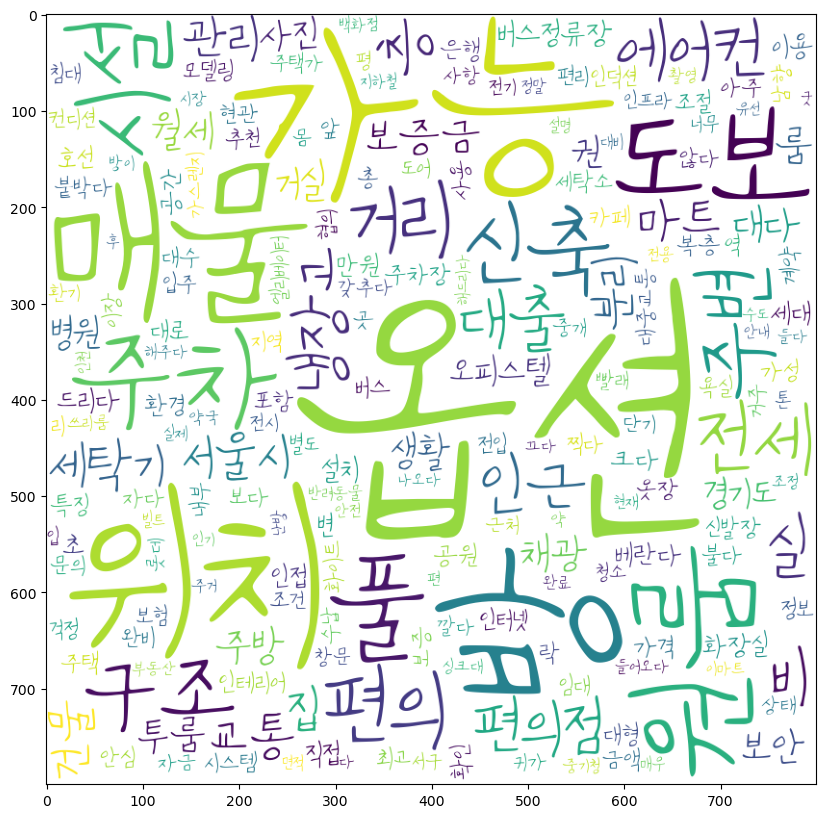

In [23]:
# 명사, 동사, 형용사 부사로 워드 클라우드
font_path = "나눔손글씨 버드나무.ttf"

wordclouds = WordCloud(width=800,
                      height=800,
                      background_color='White',
                      font_path=font_path)

from collections import Counter
count = Counter(text)
wordclouds = wordclouds.generate_from_frequencies(count)

fig = plt.figure(figsize=(10,10))
plt.imshow(wordclouds.to_array())
plt.show()

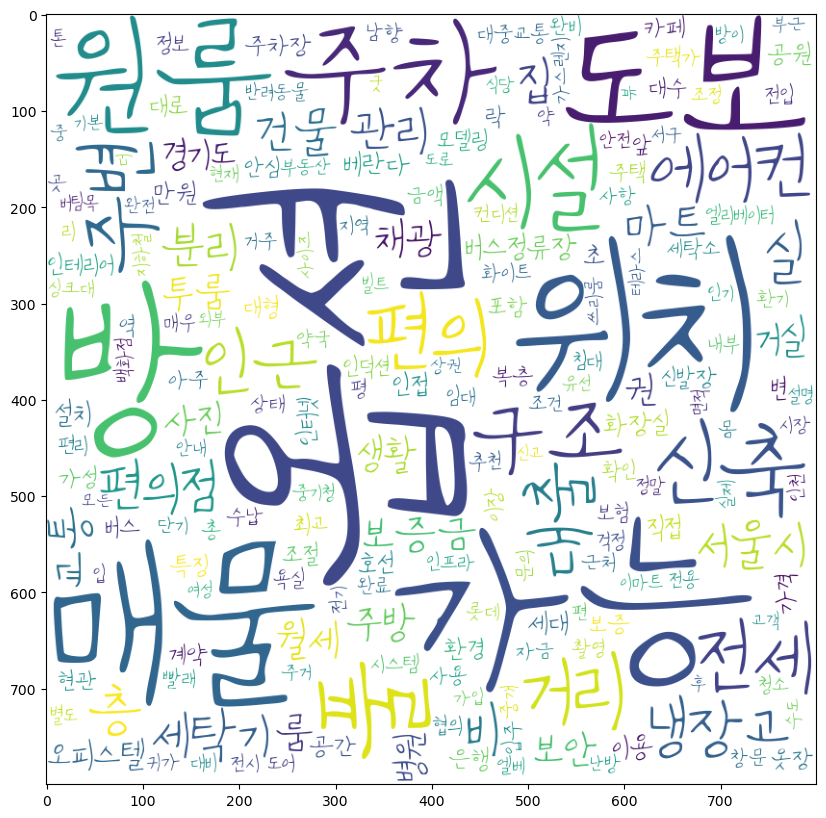

In [24]:
# 명사로만 워드클라우드

df_noun = data.text_noun.tolist()
df_noun2 = flatten(df_noun)
text2 = nltk.Text(df_noun2)

wordclouds = WordCloud(width=800,
                      height=800,
                      background_color='white',
                      font_path=font_path)

from collections import Counter
count = Counter(text2)
wordclouds = wordclouds.generate_from_frequencies(count)

fig = plt.figure(figsize=(10,10))
plt.imshow(wordclouds.to_array())
plt.show()

In [25]:
data.to_pickle('seoul_oneroom_for_ml.pkl')

# 군집분석 - Clustering(Actor 도출)

In [7]:
data = pd.read_pickle("team3_data_vectorized.pkl")

In [10]:
data1 = data.text_noun.tolist() #series -> list
data2 = flatten(data1)
data2[:20]

['그냥',
 '정도',
 '정해진',
 '밥상',
 '고요',
 '집',
 '반찬',
 '말',
 '요즘',
 '집',
 '밥',
 '뭐',
 '사기',
 '라푀',
 '유',
 '크로와상',
 '부산광역시',
 '부산진구',
 '중앙',
 '번가']

### tf-idf

In [14]:
for i in range(len(data1)):
    if data1[i] == []:
        print(i)

20670
22736
23236


In [17]:
del data1[23236]
del data1[22736]
del data1[20670]


In [18]:
data3 = []
for i in data1:
    string = i[0]
    for w in i[1:]: # 첫번째 이후 단어부터 토큰으로 이어 붙여줌
        string += " " # 단어 사이는 띄어쓰기로 연결
        string += w # 띄어쓰고 난 다음 단어 써주기를 반복
    data3.append(string)
data3 # 쉼표를 기준으로 document가 구분됨(,)

['그냥 정도 정해진 밥상 고요 집 반찬 말 요즘 집 밥 뭐 사기 라푀 유 크로와상 부산광역시 부산진구 중앙 번가 길 층 호 라푀 유 크로와상 서면 크로와상 맛집 라푀 유 크로와상 알 난 원래 어제 빵 사려 유리창 너머 녹차 버터 유혹 사보 림 알바 기전 밥 빵 배 막걸리 저만큼 쓰레기통 길 알바 홀 주먹밥 인간 배 사실 항상 만 주먹밥 만 동글동글 말 아침 언니 준 바이오 플레 빨미까레 정도 출근 빨미까레 빵집 빨미까레 직원 새 차장 아침 불고기 샌드위치 아가 바나나 우유 점심 다다믄 만 주문 오늘 다앵 점심 충무김밥 잔치국수 원래 충무김밥 오징어 제일 알 오징어 국수 나머지 용서 뭐 점심시간 집 자리 간식 창고 다이어트 코로나 후유증 우울증 심리 상담 우울증 흥이 민족 집 심리 상담 금융 치료 주시 최애 달 모양 손톱 달이 세일러문 달이 싸이 부활 엄마 준 아이디 기억 비번 다시 설정 함 와중 아이디 양식 이메일 야후 지금 야후 촌 구경 남친 하성 사람 도대체 연락',
 '글 기간 일상 난 시험 일생 연 중간 나머지 썩 뭐 공부 결과 일지 버섯 이의 고딩 친구 이자 일생 연 메이트 친구 밥 더 보기 지도 데이터 지도 컨트롤러 범례 부동산 거리 읍 면 동시 군 구시 도국 오샬 서울특별시 성북구 고려 길 빌딩 층 예약 오샬 점심 가면 세트 천원 할인 가성 비 완전 중간 고수 밥 일생 연 가다가 고양이 봄 캠 고양이 날 저녁 밥 약도 학년 후배 소정 더 보기 지도 데이터 지도 컨트롤러 범례 부동산 거리 읍 면 동시 군 구시 도국 소정 본점 서울특별시 성북구 개운사 길 층 돈카츠 비텐 세트 역시 존맛 새우 튀김 비텐 진짜진짜 날 콘서트 티켓 온 날 지난 포스팅 벼르던 자켓 새 바지 산 날 윈봉 준비 벌 프리미엄 그냥 벌투 자꾸 티켓 컷 티켓 카드 소장 더 자켓 바지 맘 역시 바지 집 길 아파트 감성 샷 일생 연 친구 점심 와앨가 와플 더 보기 지도 데이터 지도 컨트롤러 범례 부동산 거리 읍 면 동시 군 구시 도국 와플 앨리 서울특별시 성북구 고려 길 아메리카노 순